In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import bagpipes as pipes
from astropy.table import Table
import os
import random

In [3]:
#file = 'NSF1_match_ELG.fits'

# Function

In [25]:
def load_data(ID):
    """ Load Catalog """
    

    # load up the the catalogue in FITS.
    table = Table.read(file)
    #table = pd.read_csv('crossmatch_GALEX_Halpha.csv')
    
    # The ID is the object we wanna fit.
    row = int(ID) #ID 

    # Extract the filters we want from the catalogue.
    #2 is the aperture, can be changed
    n = 2

    fluxes = np.array([table['nuv_flux'][row],
                     table['FLUX_APER_g_1'][row][n], 
                     table['FLUX_APER_r_1'][row][n],
                     table['FLUX_APER_i_1'][row][n],
                     table['FLUX_APER_z_1'][row][n],
                     #table['FLUX_APER'][row][n],
                     table['FLUX_APER_y_1'][row][n]]) 
                                                   
    fluxerrs = np.array([table['nuv_fluxerr'][row],
                     table['FLUXERR_APER_g_1'][row][n], 
                     table['FLUXERR_APER_r_1'][row][n],
                     table['FLUXERR_APER_i_1'][row][n],
                     table['FLUXERR_APER_z_1'][row][n],
                     #table['FLUXERR_APER'][row][n],
                     table['FLUXERR_APER_y_1'][row][n]])
    
    # Turn these into a 2D array.
    photometry = np.c_[fluxes, fluxerrs]

    # blow up the errors associated with any missing fluxes.
#     for i in range(len(photometry)):
#         if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
#             photometry[i,:] = [0., 9.9*10**99.]
            
        

    return photometry

# Filters

In [18]:
DECAM_filt_list = ["filters/GALEX_GALEX.NUV.dat",
                    "filters/CTIO_DECam.g.dat",
                    "filters/CTIO_DECam.r.dat",
                    "filters/CTIO_DECam.i.dat",
                    "filters/CTIO_DECam.z.dat",
                    #"filters/NB640_FilterResponse.dat",
                    "filters/CTIO_DECam.Y.dat"]

#"filters/NB640_FilterResponse.dat",

# Fitting Galaxy

In [19]:
# table = Table.read('NSF1_redshift.fits')
# #table

In [20]:
# mask3 =  (1.3 < table['redshift_50']) & (table['redshift_50'] < 1.9)
# table[mask3][18]

In [21]:
id_gal = "0"

In [22]:
galaxy = pipes.galaxy(
    id_gal, load_data, spectrum_exists=False, filt_list=DECAM_filt_list)
fig = galaxy.plot()

TypeError: ufunc 'square' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
burst = {}
burst["age"] = (0., 15.)                  # Vary age from 0 to 15 Gyr
burst["metallicity"] =  (0., 2.5)          # Vary metallicity from 0 to 2.5 Solar
burst["massformed"] = (0., 13.) 
# Vary log_10(mass formed) from 0 to 13
nebular = {}
nebular["logU"] = -3


fit_instructions = {}
fit_instructions["burst"] = burst   # Add the burst sfh component to the fit7
fit_instructions['nebular'] = nebular
#fit_instructions["redshift"] = (0.,3.)

fit_instructions["redshift"] = (0., 3.)
# fit_instructions["redshift_prior"] = "Gaussian"
# fit_instructions["redshift_prior_mu"] = 0.47
# fit_instructions["redshift_prior_sigma"] = 0.2

In [11]:
# dblplaw = {}                        
# dblplaw["tau"] = (0., 15.)                # Vary the time of peak star-formation between
#                                           # the Big Bang at 0 Gyr and 15 Gyr later. In 
#                                           # practice the code automatically stops this
#                                           # exceeding the age of the universe at the 
#                                           # observed redshift.
            
# dblplaw["alpha"] = (0.01, 1000.)          # Vary the falling power law slope from 0.01 to 1000.
# dblplaw["beta"] = (0.01, 1000.)           # Vary the rising power law slope from 0.01 to 1000.
# dblplaw["alpha_prior"] = "log_10"         # Impose a prior which is uniform in log_10 of the 
# dblplaw["beta_prior"] = "log_10"          # parameter betweenthe limits which have been set 
#                                           # above as in Carnall et al. (2017).
# dblplaw["massformed"] = (1., 15.)
# dblplaw["metallicity"] = (0.1, 2.5)
# dblplaw["metallicity_prior"] = "log_10"

# dust = {}
# dust["type"] = "CF00"
# dust["eta"] = 2.
# dust["Av"] = (0., 2.0)
# dust["n"] = (0.3, 2.5)
# dust["n_prior"] = "Gaussian"
# dust["n_prior_mu"] = 0.7
# dust["n_prior_sigma"] = 0.3

# dust = {}                           
# dust["type"] = "Calzetti"
# dust["Av"] = (0., 2.)

# nebular = {}
# nebular["logU"] = -3.

# fit_info = {}                            # The fit instructions dictionary
# fit_info["redshift"] = (0, 5)         # Vary observed redshift from 0 to 10

# #fit_info["redshift_prior"] = "Gaussian"  # From looking at the spectrum in Example 2 it's
# #fit_info["redshift_prior_mu"] = 0.77082   # clear that this  object is at around z = 1. We'll 
# #fit_info["redshift_prior_sigma"] = 0.0005 # include that information with a broad Gaussian
#                                          # prior centred on redshift 1. Parameters of priors
#                                          # are passed starting with "parameter_prior_".


# # fit_info["veldisp"] = (50., 70.)   #km/s
# # fit_info["veldisp_prior"] = "log_10"

# fit_info["dblplaw"] = dblplaw 
# fit_info["dust"] = dust
# #fit_info["nebular"] = nebular

# # calib = {}
# # calib["type"] = "polynomial_bayesian"

# # calib["0"] = (0.5, 1.5) # Zero order is centred on 1, at which point there is no change to the spectrum.
# # calib["0_prior"] = "Gaussian"
# # calib["0_prior_mu"] = 1.0
# # calib["0_prior_sigma"] = 0.25

# # calib["1"] = (-0.5, 0.5) # Subsequent orders are centred on zero.
# # calib["1_prior"] = "Gaussian"
# # calib["1_prior_mu"] = 0.
# # calib["1_prior_sigma"] = 0.25

# # calib["2"] = (-0.5, 0.5)
# # calib["2_prior"] = "Gaussian"
# # calib["2_prior_mu"] = 0.
# # calib["2_prior_sigma"] = 0.25

# # fit_info["calib"] = calib

# # mlpoly = {}
# # mlpoly["type"] = "polynomial_max_like"
# # mlpoly["order"] = 2

# noise = {}
# noise["type"] = "white_scaled"
# noise["scaling"] = (1., 10.)
# noise["scaling_prior"] = "log_10"
# fit_info["noise"] = noise

In [12]:
%%time

#os.remove('pipes/posterior/3582.h5')
fit = pipes.fit(galaxy, fit_instructions)

fit.fit(verbose=False)


Bagpipes: fitting object 63


Completed in 53.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.359      0.410      0.474
burst:massformed              11.193     11.269     11.351
burst:metallicity              0.100      0.401      1.354
redshift                       1.642      1.691      1.788


CPU times: user 53.4 s, sys: 124 ms, total: 53.5 s
Wall time: 53.5 s


/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


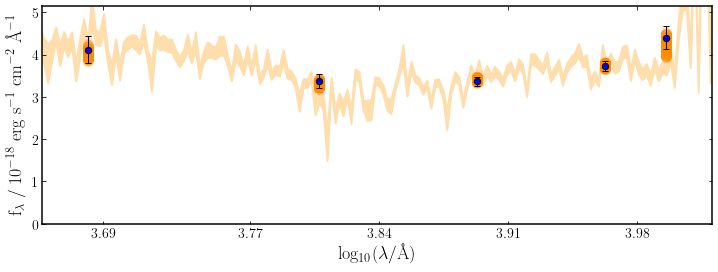

In [13]:
fig = fit.plot_spectrum_posterior(show=True, save=False)

# Fitting catalog

In [8]:
# IDs = np.arange(3000,len(table)+1)
# #IDs = result
# #IDs = np.arange(0,1000)

# fit_cat = pipes.fit_catalogue(IDs, fit_instructions, load_data, spectrum_exists=False,
#                               cat_filt_list=DECAM_filt_list, run="NSF_final")


# #test_mag_ es de 0 a 100 sin NB
# fit_cat.fit(verbose=False)

In [ ]:
# dat = Table.read('pipes/cats/NSF_z_random_500.fits')
# dat

In [ ]:
# plt.hist(dat['redshift_50'], bins =50, histtype ='bar', alpha = 0.5, color = 'slategray', bottom = 0,ec = 'k')
# plt.vlines(0.47,0,100, linestyle ='dashed', alpha = 0.5)
# plt.vlines(0.93,0,100, linestyle ='dashed', alpha = 0.5)
# plt.vlines(1.59,0,100, linestyle ='dashed', alpha = 0.5)
# plt.xlim(0,2)
# plt.show()

In [19]:
# mask = (dat['redshift_50'] < 0.48) & (dat['redshift_50'] > 0.46)

In [9]:
# dat[mask]